<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 01: Clasificación de dígitos

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Daniela Paz Díaz Mora

__Rol__: 201710003-6

## Clasificación de dígitos
En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


## Contenidos
* [K Nearest Neighbours](#k_nearest_neighbours)
* [Exploración de Datos](#data_exploration)
* [Entrenamiento y Predicción](#train_and_prediction)
* [Selección de Modelo](#model_selection)

<a id='k_neirest_neighbours'></a>

## K Nearest Neighbours

El algoritmo **k Nearest Neighbors** es un método no paramétrico: una vez que el parámetro $k$ se ha fijado, no se busca obtener ningún parámetro adicional.

Sean los puntos $x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$  de etiqueta $y^{(i)}$ conocida, para $i=1, ..., m$.

El problema de clasificación consiste en encontrar la etiqueta de un nuevo punto $x=(x_1, ..., x_m)$ para el cual no conocemos la etiqueta.

La etiqueta de un punto se obtiene de la siguiente forma:
* Para $k=1$, **1NN** asigna a $x$ la etiqueta de su vecino más cercano. 
* Para $k$ genérico, **kNN** asigna a $x$ la etiqueta más popular de los k vecinos más cercanos. 

El modelo subyacente a kNN es el conjunto de entrenamiento completo. A diferencia de otros métodos que efectivamente generalizan y resumen la información (como regresión logística, por ejemplo), cuando se necesita realizar una predicción, el algoritmo kNN mira **todos** los datos y selecciona los k datos más cercanos, para regresar la etiqueta más popular/más común. Los datos no se resumen en parámetros, sino que siempre deben mantenerse en memoria. Es un método por tanto que no escala bien con un gran número de datos.

En caso de empate, existen diversas maneras de desempatar:
* Elegir la etiqueta del vecino más cercano (problema: no garantiza solución).
* Elegir la etiqueta de menor valor (problema: arbitrario).
* Elegir la etiqueta que se obtendría con $k+1$ o $k-1$ (problema: no garantiza solución, aumenta tiempo de cálculo).

La cercanía o similaridad entre los datos se mide de diversas maneras, pero en general depende del tipo de datos y del contexto.

* Para datos reales, puede utilizarse cualquier distancia, siendo la **distancia euclidiana** la más utilizada. También es posible ponderar unas componentes más que otras. Resulta conveniente normalizar para poder utilizar la noción de distancia más naturalmente.

* Para **datos categóricos o binarios**, suele utilizarse la distancia de Hamming.

A continuación, una implementación de "bare bones" en numpy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def knn_search(X, k, x):
    """ find K nearest neighbours of data among D """
    # Distancia euclidiana
    d = np.linalg.norm(X - x, axis=1)
    # Ordenar por cercania
    idx = np.argsort(d)
    # Regresar los k mas cercanos
    id_closest = idx[:k] 
    return id_closest, d[id_closest].max()

def knn(X,Y,k,x):
    # Obtener los k mas cercanos
    k_closest, dmax = knn_search(X, k, x)
    # Obtener las etiquetas
    Y_closest = Y[k_closest]
    # Obtener la mas popular
    counts = np.bincount(Y_closest.flatten())
    # Regresar la mas popular (cualquiera, si hay empate)
    return np.argmax(counts), k_closest, dmax

def plot_knn(X, Y, k, x):
    y_pred, neig_idx, dmax = knn(X, Y, k, x)    
    # plotting the data and the input point
    fig = plt.figure(figsize=(8, 8))
    plt.plot(x[0, 0], x[0, 1], 'ok', ms=16)
    m_ob = Y[:, 0] == 0
    plt.plot(X[m_ob, 0], X[m_ob, 1], 'ob', ms=8)
    m_sr = Y[:,0] == 1
    plt.plot(X[m_sr, 0], X[m_sr, 1], 'sr', ms=8)

    # highlighting the neighbours
    plt.plot(X[neig_idx, 0], X[neig_idx, 1], 'o', markerfacecolor='None', markersize=24, markeredgewidth=1)

    # Plot a circle
    x_circle = dmax * np.cos(np.linspace(0, 2*np.pi, 360)) +  x[0, 0]
    y_circle = dmax * np.sin(np.linspace(0, 2*np.pi, 360)) +  x[0, 1]
    plt.plot(x_circle, y_circle, 'k', alpha=0.25)
    plt.show();

    # Print result
    if y_pred==0:
        print("Prediccion realizada para etiqueta del punto = {} (circulo azul)".format(y_pred))
    else:
        print("Prediccion realizada para etiqueta del punto = {} (cuadrado rojo)".format(y_pred))

Puedes ejecutar varias veces el código anterior, variando el número de vecinos `k` para ver cómo afecta el algoritmo.

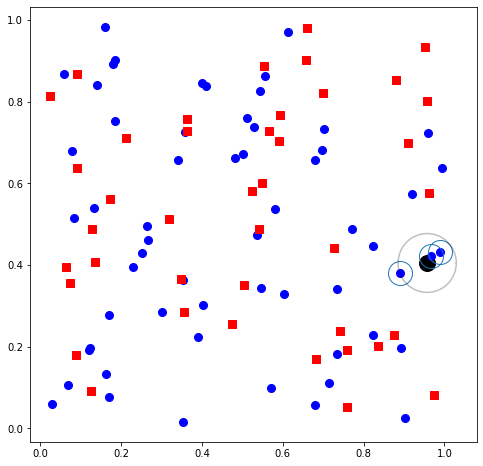

Prediccion realizada para etiqueta del punto = 0 (circulo azul)


In [3]:
k = 3  # hyper-parameter
N = 100
X = np.random.rand(N, 2) # random dataset
Y = np.array(np.random.rand(N) < 0.4, dtype=int).reshape(N, 1) # random dataset
x = np.random.rand(1, 2) # query point

# performing the search
plot_knn(X, Y, k, x)    

<a id='data_exploration'></a>

## Exploración de los datos

A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [4]:
import pandas as pd
from sklearn import datasets

In [5]:
digits_dict = datasets.load_digits()

In [6]:
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [8]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 64 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [9]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1

**_(10 puntos)_**

**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [10]:
digits.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Columns: 65 entries, c00 to target
dtypes: int64(65)
memory usage: 912.7 KB


**R**: Por lo tanto el datframe ocupa 912.7 KB de memoria, los datos son tipo int64


**Se procedera a verificar si todos los registros estan en el rango descritos

In [11]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


**R**: por lo tanto los datos se encuentran en el rango descrito [0,16] y se puede apreciar los estadisticos de cada clase(pixel), se puede concluir que el pixel c00 siempre es blanco.

In [38]:
for i in np.arange(0,10):
    print('hay', digits['target'].tolist().count(i), 'registros de la clase', i)

hay 178 registros de la clase 0
hay 182 registros de la clase 1
hay 177 registros de la clase 2
hay 183 registros de la clase 3
hay 181 registros de la clase 4
hay 182 registros de la clase 5
hay 181 registros de la clase 6
hay 179 registros de la clase 7
hay 174 registros de la clase 8
hay 180 registros de la clase 9


**R:** Además se puede ver que los datos estan desbalanceados respectos a las etiquetas, 5 tiene el maximo de registros (181) y 8 tiene el minimo de registros (179)

### Ejercicio 2

**_(10 puntos)_**

**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [13]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

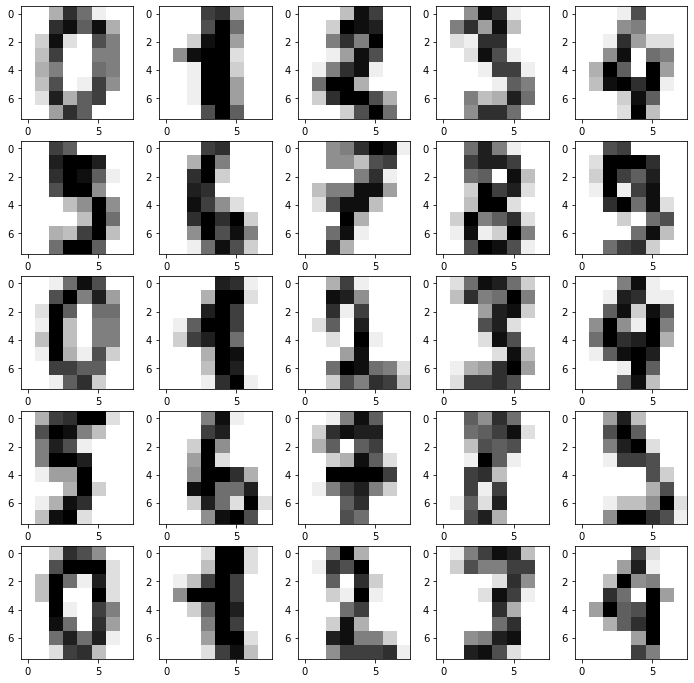

In [14]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

count=0
for x in np.arange(0,nx):
    for y in np.arange(0,ny):
        axs[x,y].imshow(digits_dict["images"][count],cmap='gray_r',vmin=0,vmax=16)
        count+=1

<a id='train_and_prediction'></a>

## Entrenamiento y Predicción

Se utilizará la implementación de `scikit-learn` llamada `KNeighborsClassifier` (el cual es un _estimator_) que se encuentra en `neighbors`.

Utiliza la métrica por defecto.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
X = digits.drop(columns="target").values
y = digits["target"].values

### Ejercicio 3

**_(10 puntos)_**

Entrenar utilizando todos los datos. Además, recuerda que `k` es un hiper-parámetro, por lo tanto prueba con distintos tipos `k` y obten el `score` desde el modelo.

In [17]:
k_array = np.arange(1, 101)

In [18]:
for k in k_array:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X,y)
    print('Para k=',k,'se tiene un score',neigh.score(X,y))

Para k= 1 se tiene un score 1.0
Para k= 2 se tiene un score 0.9910962715637173
Para k= 3 se tiene un score 0.993322203672788
Para k= 4 se tiene un score 0.9922092376182526
Para k= 5 se tiene un score 0.9905397885364496
Para k= 6 se tiene un score 0.989983305509182
Para k= 7 se tiene un score 0.9905397885364496
Para k= 8 se tiene un score 0.9894268224819143
Para k= 9 se tiene un score 0.9888703394546466
Para k= 10 se tiene un score 0.9855314412910406
Para k= 11 se tiene un score 0.988313856427379
Para k= 12 se tiene un score 0.9877573734001113
Para k= 13 se tiene un score 0.986644407345576
Para k= 14 se tiene un score 0.9860879243183083
Para k= 15 se tiene un score 0.9855314412910406
Para k= 16 se tiene un score 0.9844184752365053
Para k= 17 se tiene un score 0.9838619922092376
Para k= 18 se tiene un score 0.9833055091819699
Para k= 19 se tiene un score 0.9838619922092376
Para k= 20 se tiene un score 0.9821925431274346
Para k= 21 se tiene un score 0.9816360601001669
Para k= 22 se tiene 

**Preguntas**

* ¿Cuál fue la métrica utilizada?
* ¿Por qué entrega estos resultados? En especial para k=1.
* ¿Por qué no se normalizó o estandarizó la matriz de diseño?

* **R**: Se utiliza por defecto la métrica 'Minkowski', con *p*=2, lo cual equivale a la distancia euclidiana estandar
* **R**: Porque el score entrega la precisión medida, como entrenamos el modelo con todos los datos y con n_neighboirs=1 estamos solicitando que nos entregue un vecino. la precisión es exacta y nos retorna 1.
* **R**: No se normaliza ya que darian valores muy pequeños y el score que resulta seria muy malo


### Ejercicio 4

**_(10 puntos)_**

Divide los datos en _train_ y _test_ utilizando la función preferida del curso. Para reproducibilidad utiliza `random_state=42`. A continuación, vuelve a ajustar con los datos de _train_ y con los distintos valores de _k_, pero en esta ocasión calcula el _score_ con los datos de _test_.

¿Qué modelo escoges?

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

In [21]:
dic_k={}
for k in k_array:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    print('Para k=',k,'se tiene un score de',clf.score(X_test,y_test))
    dic_k[k]=clf.score(X_test,y_test)

Para k= 1 se tiene un score de 0.9777777777777777
Para k= 2 se tiene un score de 0.9805555555555555
Para k= 3 se tiene un score de 0.9833333333333333
Para k= 4 se tiene un score de 0.9805555555555555
Para k= 5 se tiene un score de 0.9861111111111112
Para k= 6 se tiene un score de 0.9888888888888889
Para k= 7 se tiene un score de 0.9888888888888889
Para k= 8 se tiene un score de 0.9861111111111112
Para k= 9 se tiene un score de 0.9805555555555555
Para k= 10 se tiene un score de 0.9833333333333333
Para k= 11 se tiene un score de 0.9833333333333333
Para k= 12 se tiene un score de 0.9777777777777777
Para k= 13 se tiene un score de 0.9777777777777777
Para k= 14 se tiene un score de 0.9805555555555555
Para k= 15 se tiene un score de 0.9805555555555555
Para k= 16 se tiene un score de 0.9805555555555555
Para k= 17 se tiene un score de 0.9833333333333333
Para k= 18 se tiene un score de 0.9805555555555555
Para k= 19 se tiene un score de 0.975
Para k= 20 se tiene un score de 0.9777777777777777
Pa

In [22]:
max_score=max(dic_k.values())
for i in dic_k.keys():
    if dic_k[i] ==max_score:
        print('El modelo alcanza su maximo para k igual a', i,'donde el maximo es', max_score)

El modelo alcanza su maximo para k igual a 6 donde el maximo es 0.9888888888888889
El modelo alcanza su maximo para k igual a 7 donde el maximo es 0.9888888888888889


**R**: Se escoge el modelo con k=6

<a id='model_selection'></a>

## Selección de Modelo

### Ejercicio 5

**_(15 puntos)_**


**Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada.

¿Qué podrías decir de la elección de `k`?

In [23]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits

In [24]:
X, y = load_digits(return_X_y=True)

param_range = np.arange(1, 101)
train_scores, test_scores = validation_curve( KNeighborsClassifier(), X, y, param_name="n_neighbors", param_range=param_range,scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

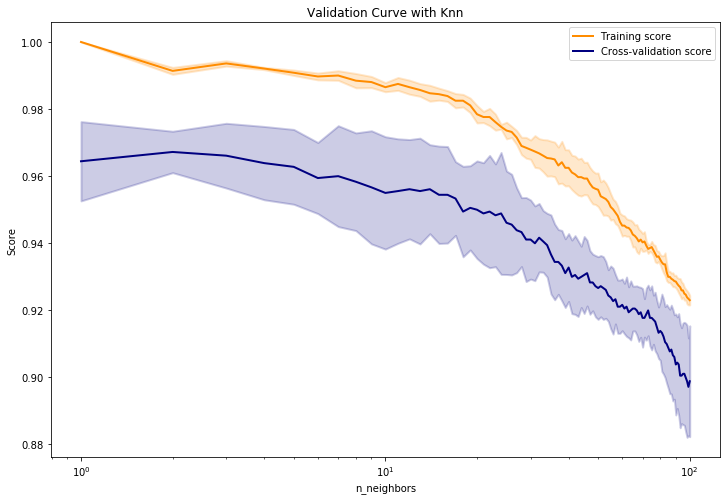

In [25]:
plt.figure(figsize=(12, 8))

plt.title("Validation Curve with Knn")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

**Pregunta**

* ¿Qué refleja este gráfico?
* ¿Qué conclusiones puedes sacar a partir de él?
* ¿Qué patrón se observa en los datos, en relación a los números pares e impares? ¿Porqué sucede esto?

* **R:** este gráfico representa el rendimiento de los datos de entrenamientos (en naranjo) versus  el cross validation que representa distinta parciones, a la cual se analiza su score a partir de los diversos k, es por esto que hay una franja azul, la linea representa el promedio
* **R:** se pude ver que tan bueno es el ajuste comparando el score usando como entrenamiento todos los datos versus usando los datos de entrenamiento, se puede concluir que a medida que k aumentan se obtiene un peor rendimiento porque el mejor k deberia ser un entero cercano a 1.
* **R:** No se observa ningún patron respecto a los números pares e impares, pero se deduce hay un comportamiento alternante que va disminuyendo a medida que los valores de k aumentan.
* **R:** Se puede decir de k que a medida que aumenta su valor menor va a ser el rendimiento.

### Ejercicio 6

**_(15 puntos)_**

**Búsqueda de hiper-parámetros con validación cruzada:** Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación del parámetro _k_. Prueba con valores de _k_ desde 2 a 100.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameters = np.arange(2,101)
digits_gscv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': parameters}).fit(X,y)

In [28]:
# Best params
digits_gscv.best_params_

{'n_neighbors': 2}

**Pregunta**

* ¿Cuál es el mejor valor de _k_?
* ¿Es consistente con lo obtenido en el ejercicio anterior?

* **R**: k=2
* **R**: Por una parte no ya que el ejercicio 5 nos daba que el mejor valor de k se obtenia cuando este valia 6 o 7, pero no obstante del ejercicio anterior se deduce que el score disminuye al aumentar los k, y que cuando k es aproximadamente 2 se obtenia el mejor score

### Ejercicio 7

**_(10 puntos)_**

__Visualizando datos:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 

* Define la variable `best_knn` que corresponde al mejor estimador `KNeighborsClassifier` obtenido.
* Ajusta el estimador anterior con los datos de entrenamiento.
* Crea el arreglo `y_pred` prediciendo con los datos de test.

_Hint:_ `digits_gscv.best_estimator_` te entrega una instancia `estimator` del mejor estimador encontrado por `GridSearchCV`.

In [29]:
best_knn =digits_gscv.best_estimator_.fit(X_train,y_train)

In [30]:
y_pred = best_knn.predict(X_test)

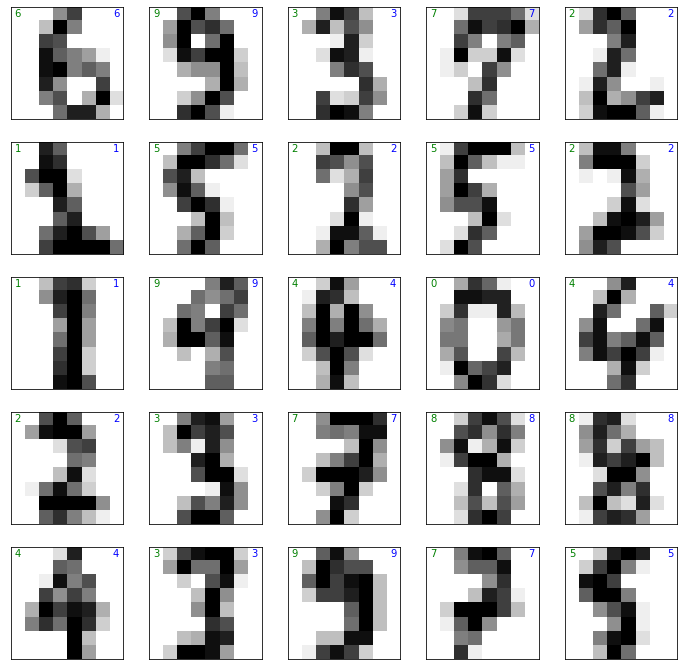

In [31]:
# Mostrar los datos correctos
mask = (y_pred == y_test)
X_aux = X_test[mask]
y_aux_true = y_test[mask]
y_aux_pred = y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j + ny * i
        data  = X_aux[index, :].reshape(8,8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color='green')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

Modifique el código anteriormente provisto para que muestre los dígitos incorrectamente etiquetados, cambiando apropiadamente la máscara. Cambie también el color de la etiqueta desde verde a rojo, para indicar una mala etiquetación. 

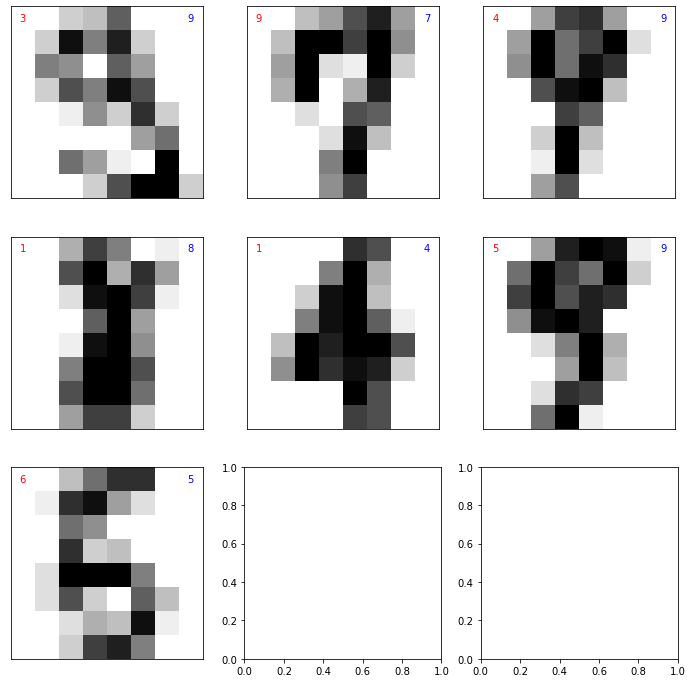

In [32]:
# Mostrar los datos incorrectos
mask = (y_pred != y_test)
X_aux = X_test[mask]
y_aux_true = y_test[mask]
y_aux_pred = y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 3,3
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j + ny * i
        if index < len(X_aux):
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color='r')
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='b')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
        
plt.show()

**Pregunta**

* Solo utilizando la inspección visual, ¿Por qué crees que falla en esos valores?

**R:** Porque en esos números los pixeles no representan bien su valor (8x8), por ejemplo en el último yo igual diria que es un 6, al igual que pasa con lo demás por inspección visual no podría dar certeza en la predicción de la imagen

### Ejercicio 8

**_(10 puntos)_**

**Matriz de confusión:** Grafica la matriz de confusión.

**Importante!** Al principio del curso se entregó una versión antigua de `scikit-learn`, por lo cual es importante que actualicen esta librearía a la última versión para hacer uso de `plot_confusion_matrix`. Hacerlo es tan fácil como ejecutar `conda update -n mat281 -c conda-forge scikit-learn` en la terminal de conda.

In [33]:
from sklearn.metrics import plot_confusion_matrix

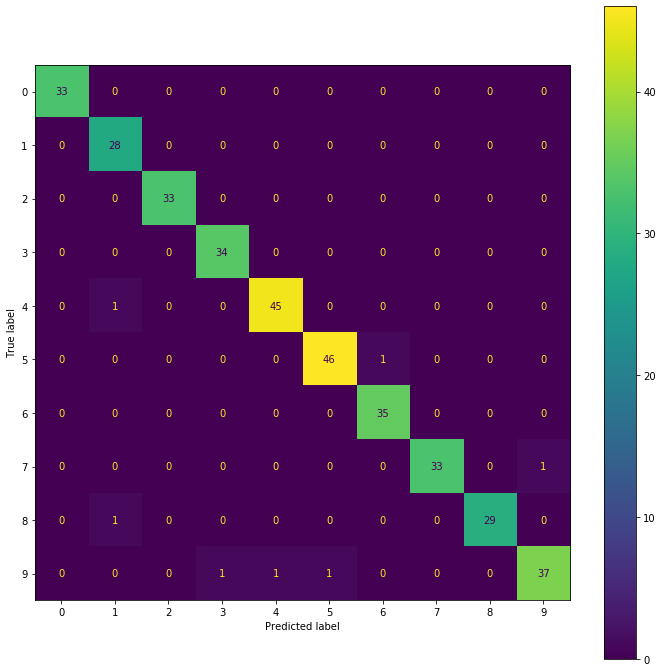

In [34]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(best_knn, X_test, y_test,ax=ax)


**Pregunta**

* ¿Cuáles son las etiquetas con mejores y peores predicciones?
* Con tu conocimiento previo del problema, ¿Por qué crees que esas etiquetas son las que tienen mejores y peores predicciones?

* **R:** Las etiquetas con mejores predicciones son el 0, 1, 2, 3 y 6 y las peores etiquetas son 9, 8, 7, 4 y 5 (en este orden porcentual)
* **R:** Las mejores etiquetas son mas facil de representar en calidad de 8x8 pixels versus las otras que ocupan mucho de los pixeles dando paso a la incertidumbre de la predicción.


### Ejercicio 9

**_(10 puntos)_**

**Curva de aprendizaje:** Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py) pero solo utilizando un modelo de KNN con el hiperparámetro _k_ seleccionado anteriormente. 

In [35]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [36]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

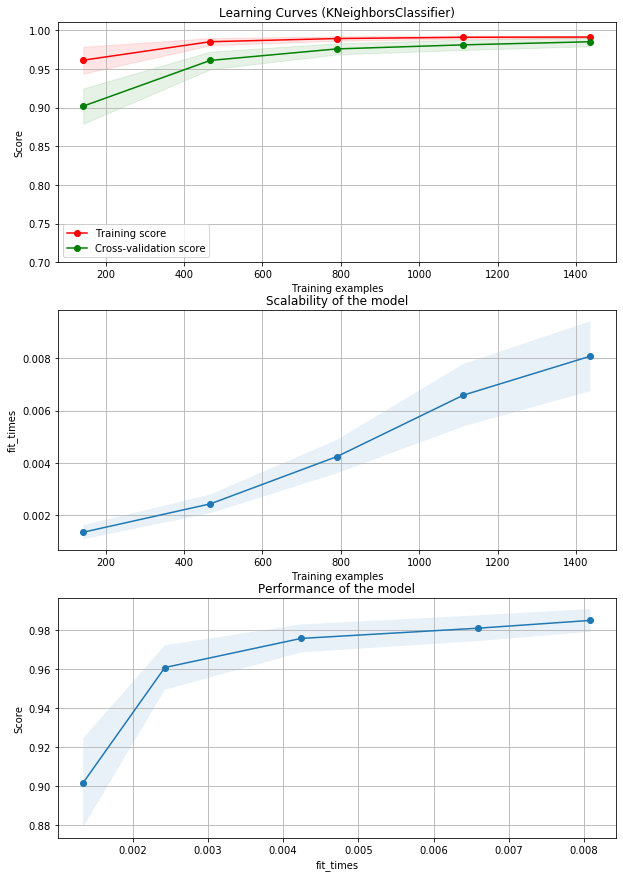

In [37]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (KNeighborsClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = best_knn
plot_learning_curve(estimator, title, X, y,axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.show()

**Pregunta**

* ¿Qué refleja este gráfico?
* ¿Qué conclusiones puedes sacar a partir de él?
* ¿En qué crees que hay que poner más atención a la hora de trabajar con un problema de clasificación?

* **R:** refleja el rendimiento del algoritmo versus el tamaño de los datos de entrenamiento, es el tiempo utilizado versus la cantidad de datos de entrenamiento y el ultimo el rendimiento versus el tiempo gastado.
* **R:** en todas hay una relación positiva entre las variables, es decir si aumenta la variable independiente aumentra la dependiente, por lo tanto entre mayor sea la cantidad de datos de entrenamientos mayor sera el score pero también sera mayor el tiempo para computar este.
* **R:** en maximixar el score talque al utilizar cierta cantidad de datos de entrenamiento el tiempo gastado no sea tan alto.